In [1]:
!python --version

Python 3.9.12


In [2]:
!pip install pandas
!pip install konlpy
!pip install umap
!pip install -U scikit-learn
!pip install --upgrade pip
!pip install matplotlib
!pip3 install plotly

In [3]:
from datetime import datetime

import logging
import re

import numpy as np
import pandas as pd

In [4]:
import os
os.getcwd()
import pandas as pd
path = "C:/Users/Notebiz003/BerTopic/data/"
file_list = os.listdir(path)
dfs = []

In [5]:
def data_pro(data,from_date,to_date):

    df = data[['일자','키워드']]
    df['일자'] = [str(x)[0:6] for x in df['일자']] 

    datelist = pd.date_range(start=from_date, end=to_date, freq = 'M').tolist()
    dtlst = []

    for d_t in datelist:
        d_t = str(d_t)[0:-9]
        d = datetime.strptime(d_t, '%Y-%m-%d')
        d = d.strftime('%Y%m')
        dtlst.append(d)

    # 키워드 사전 
    keyword_vocab = []
    for i in df['키워드']:
        keyword_vocab.extend(i)
    keyword_vocab = list(set(keyword_vocab))

    # 월별 카운팅 후 병합
    from collections import Counter

    tmp_df_list = []
    for dt in dtlst:
        tmp = []
        for i in df[df['일자']== dt]['키워드']:
            tmp.extend(i)
        tmp_df = pd.DataFrame(pd.Series(Counter(tmp)))
        tmp_df = tmp_df.reset_index()
        tmp_df = tmp_df.rename(columns = {0:'cnt','index':'keyword'})
        tmp_df_list.append(tmp_df)

    df = tmp_df_list[0].merge(tmp_df_list[1], on = 'keyword', how = 'outer')
    for i in range(len(tmp_df_list)):
        if i > 1:
            df = df.merge(tmp_df_list[i], on = 'keyword', how = 'outer')
    col = ['keyword'] + dtlst
    df.columns = col

    # 합산 값 만들기
    df.index = df['keyword']
    df = df.drop('keyword', axis = 1)
    df['tot_cnt'] = df.sum(axis = 1)
    df = df.T
    df['year_cnt'] = df.sum(axis = 1)
    df = df.T
    df

    # 결측치 처리
    df =df.fillna(0)
    return df

In [6]:
for i in file_list:
    df = pd.read_excel(path+i)
    dfs.append(df)
    print(i)

C:\Users\Notebiz003\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


NewsResult_20180101-20181213.xlsx


C:\Users\Notebiz003\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


NewsResult_20190101-20191231.xlsx


C:\Users\Notebiz003\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


NewsResult_20200101-20201231.xlsx


C:\Users\Notebiz003\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


NewsResult_20210101-20211231.xlsx


C:\Users\Notebiz003\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


NewsResult_20220101-20220812.xlsx


In [222]:
data = pd.concat(dfs)

In [224]:
len(data)

68315

In [228]:
## 데이터 전처리
data = pd.concat(dfs)
data = data[['뉴스 식별자','일자','제목','키워드','특성추출(가중치순 상위 50개)']]
cluster_mode = '특성추출(가중치순 상위 50개)'
corpus = data[cluster_mode].values.tolist()

df = data[['일자']]

for i, cp in enumerate(corpus):
    corpus[i] = cp.split(',')
df['키워드'] = corpus

df_k = data_pro(df,'20180801','20220731')

<ipython-input-228-233fab3f1b12>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-c3ba82095b7f>:37: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.

<ipython-input-5-c3ba82095b7f>:37: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.

<ipython-input-5-c3ba82095b7f>:37: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.

<ipython-input-5-c3ba82095b7f>:37: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'cnt_x'}

In [9]:
data_e = pd.read_csv('C:/Users/Notebiz003/Desktop/news_english.csv')

In [10]:
data_e = data_e.rename({'kwd':'키워드'},axis = 1)

In [203]:
len(data_e)

22282

In [14]:
tmp = []
for i in data_e['키워드']:
    i = i.replace('[','').replace(']','').replace('\'','').replace(' ','').split(',')
    tmp.append(i)

In [12]:
df_e = data_e[['일자','키워드']]
df_e['키워드'] = tmp

<ipython-input-12-53f16d203765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['키워드'] = tmp


In [13]:
df_e = data_pro(df_e,'20190801','20220731')

<ipython-input-5-c3ba82095b7f>:37: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(tmp_df_list[i], on = 'keyword', how = 'outer')
<ipython-input-5-c3ba82095b7f>:37: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(tmp_df_list[i], on = 'keyword', how = 'outer')
<ipython-input-5-c3ba82095b7f>:37: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(tmp_df_list[i], on = 'keyword', how = 'outer')
<ipython-input-5-c3ba82095b7f>:37: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(tmp_df_list[i], on = 'keyword', how = 'outer')
<ipy

In [207]:
# 데이터 확인
key = '농협'
df_ks[df_ks.index == key]

,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,202112,202201,202202,202203,202204,202205,202206,202207,tot_cnt,slope
keyword,,,,,,,,,,,,,,,,,,,,,
농협,16.139155,15.348016,11.422428,19.270917,20.487987,15.058659,11.123471,24.811032,22.961527,23.596036,...,16.800056,11.155338,10.60862,19.656838,11.397059,9.221941,6.083518,19.038889,1892.0,-0.096488


In [16]:
df_k = df_k[df_k['tot_cnt'] > 6]

In [17]:
df_e = df_e[df_e['tot_cnt'] > 10]

In [18]:
# 데이터 비교1 . 회귀선의 기울기
# 연도별 건수 보정(normaliae)

def get_slop(df2,from_date,to_date):
    datelist = pd.date_range(start=from_date, end=to_date, freq = 'M').tolist()
    dtlst = []
    df = df2.copy()
    for d_t in datelist:
        d_t = str(d_t)[0:-9]
        d = datetime.strptime(d_t, '%Y-%m-%d')
        d = d.strftime('%Y%m')
        dtlst.append(d)
    for dt in dtlst:
        df[dt] = df[dt][:-1]*10000 / df[dt][-1]
    from scipy import stats

    x = [x + 1for x in range(0,len(dtlst))]

    slopes = []
    for i in list(df.values):
        y = i[:-1]
        slope, intercept, r, p, std_err = stats.linregress(x, y)
        slopes.append(slope)
    df['slope'] = slopes
    return df

In [19]:
df_ks = get_slop(df_k,'20180801','20220731')

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

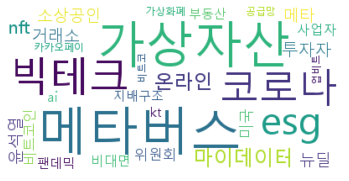

In [114]:
tags = df_ks.sort_values(by = 'slope', ascending = False)[1:30]['slope']
wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white")
cloud = wc.generate_from_frequencies(dict(tags))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

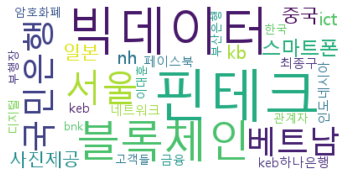

In [154]:
tags = df_ks.sort_values(by = 'slope', ascending = True)[0:30]['slope'].drop(['블록체'])
tags = tags*-1
wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white")
cloud = wc.generate_from_frequencies(dict(tags))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [48]:
df_ks.sort_values(by = 'slope', ascending = True)[:10]

,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,...,202112,202201,202202,202203,202204,202205,202206,202207,tot_cnt,slope
keyword,,,,,,,,,,,,,,,,,,,,,
핀테크,52.003945,51.415855,80.628905,47.106686,31.663252,36.070741,101.965146,85.396111,98.479437,121.126317,...,35.233451,30.423649,26.325095,35.648842,48.161765,35.179999,43.019163,31.731481,5921.0,-0.798505
빅데이터,67.246481,69.833474,68.534570,46.571383,24.213075,38.171949,35.224323,49.622065,41.841004,53.484348,...,26.133420,27.634815,12.180268,21.322672,20.220588,23.225630,16.077869,18.686317,4391.0,-0.707149
블록체인,66.349861,59.089863,80.628905,33.188801,29.800708,39.922956,43.257941,30.004039,31.125625,35.656232,...,19.600065,23.071267,23.181800,20.323172,26.102941,28.690484,21.726850,19.038889,3236.0,-0.678961
블록체,64.556622,47.578850,77.941275,34.259408,29.800708,37.821748,37.696206,44.429058,37.758955,31.461381,...,20.766736,20.535963,27.896743,31.650841,36.029412,26.299611,24.334072,30.673765,3606.0,-0.567013
서울,73.522819,64.461668,81.300813,69.589422,53.082511,62.335843,57.471264,69.240090,98.479437,74.458602,...,54.833516,53.241386,44.791953,54.972514,56.985294,61.138056,65.615087,71.924691,6824.0,-0.470121
국민은행,37.658029,42.207045,17.469596,28.371072,21.419259,24.514096,27.190706,16.733022,33.676906,13.108909,...,22.633409,10.901808,16.109387,14.659337,13.602941,17.419223,10.428888,4.230864,2220.0,-0.387426
베트남,24.208733,19.185020,21.501041,22.482736,8.381449,15.058659,22.246941,23.657031,21.430758,16.779403,...,2.800009,3.042365,3.536207,6.996502,9.191176,15.028349,6.083518,5.993724,1115.0,-0.369852
스마트폰,28.691832,22.254624,20.157226,13.382581,13.037810,9.105236,17.303176,22.503029,22.961527,33.034450,...,7.933360,8.366504,5.500766,10.328169,9.926471,7.172621,9.994351,9.519444,1685.0,-0.336781
중국,37.658029,39.904842,33.595377,32.653498,22.350531,30.117317,25.954765,43.275056,35.207674,40.899796,...,14.233381,22.817737,23.181800,25.320673,26.102941,22.884077,19.554165,11.987448,3678.0,-0.310295


In [20]:
df_es = get_slop(df_e,'20190801','20220731')

In [21]:
import plotly.io as pio
import plotly.express as px

In [22]:
def Df4plot(df3,srch_wrd):
    df3 = df3.iloc[:,:-2]
    df3 = df3.loc[srch_wrd,:].reset_index()
    df3 = pd.melt(df3, id_vars='keyword', value_vars=list(df3))
    df3['variable'] = [x[:4] + '-' + x[4].replace('0','') + x[-1:] for x in df3['variable']]
    df3["variable"] = pd.to_datetime(df3.variable)
    df3.rename(columns={"variable": "Date"}, inplace=True)
    return df3

In [28]:
def keyCmp(key_k,key_e,df_ks,df_es):
    df_plot_k = Df4plot(df_ks,[key_k])
    df_plot_e = Df4plot(df_es,[key_e])

    df_plot_k['value'] = df_plot_k['value'] / sum(df_plot_k['value'])
    df_plot_e['value'] = df_plot_e['value'] / sum(df_plot_e['value'])
    if key_k == key_e:
        df_plot_e['keyword'] = df_plot_e['keyword'] + '(en)' 
    df_plot = pd.concat([df_plot_e,df_plot_k])
    fig = px.line(
        df_plot, x="Date", y='value', color="keyword", title="{} VS {}".format(key_k,key_e)
    )
    fig.show()


In [410]:
srch_wrd = ['nft','metaverse']
# 꺽은선 그래프
df3 = Df4plot(df_es,srch_wrd)
fig = px.line(
    df3, x="Date", y='value', color="keyword", title="Key Word (2018.8 - 2022.7)"
)
fig.show()

In [409]:
srch_wrd = ['nft','메타버스']
# 꺽은선 그래프
df3 = Df4plot(df_ks,srch_wrd)
fig = px.line(
    df3, x="Date", y='value', color="keyword", title="Key Word (2018.8 - 2022.7)"
)
fig.show()

In [366]:
srch_wrd = ['빅데이터','핀테크']
# 꺽은선 그래프
df3 = Df4plot(df_ks,srch_wrd)
fig = px.line(
    df3, x="Date", y='value', color="keyword", title="Key Word (2018.8 - 2022.7)"
)
fig.show()

In [217]:
key_k = '메타버스'
key_e = 'metaverse'
keyCmp(key_k,key_e,df_ks.iloc[:,12:],df_es)


In [433]:
date = '202104'

In [430]:
tmp = []
for i in  corpus:
    tmp.append(key_k in i)
tmp_df = data[['일자','제목']][tmp]
tmp_df
tmp = []
for i in  tmp_df['일자']:
    tmp.append(date in str(i))
tmp_df[tmp]['제목']

16102                 디지털달러 나오면 비트코인은? "투기만 남아" vs "상호 보완"
16183                     역외결제 노리는 中 `디지털 위안화` 美 달러패권에 도전장
16212                         [NNA] 中 인민은행, 디지털 통화 국제연구 참여
16247                     美 경제수장 ‘디지털 달러’ 띄우기 비트코인 입지 줄어드나
16267            김상조 "CBDC 손 놓고 있지만은 않을 것 지급결제 체계 급변중"(종합)
16306                      머스크가 흔들고 옐런이 때리고 비트코인 1000만원 폭락
16319                             옐런 美재무 “비트코인, 매우 투기적 자산”
16327                              "경제 완만한 회복 완화적 통화정책 유지"
16338                 이주열 “가상화폐 내재 가치 없다 앞으로도 가격 변동성이 클 것”
16339                          말 한마디에 롤러코스터 비트코인 ‘머스크 리스크’
16356                        비트코인 작심 비판하면서 '디지털 달러' 띄우는 옐런
16383                    이주열 옐런, 비트코인에 "투기" "가치 없다" 일제히 포문
16387             이주열 美옐런 비트코인 투자 경고 "내재가치 없어","투기적자산"(종합)
16391                  이주열 "전금법, 빅브러더법 맞다...가상화폐는 내재가치 없어"
16402                                  美도 ‘디지털달러’ 中과 新화폐전쟁
16404    달러 vs 위안화 ‘디지털 화폐’ 전쟁 예고 한국은 어디쯤? [불붙은 디지털 화폐 전쟁]
16407                    한국은행 "3월 CBDC 외부컨설팅 완료 하반기 실증테스

In [434]:
tmp = []
for i in  data_e['키워드']:
    tmp.append(key_e in i)
tmp_df = data_e[['일자','news']][tmp]
tmp_df
tmp = []
for i in  tmp_df['일자']:
    tmp.append(date in str(i))
tmp_df[tmp]['news']

9279    HAVANA, April 1 (Reuters) - The Eastern Caribb...
9301    BANGKOK, April 2 (Reuters) - Thailand’s centra...
9311    When South Africa’s biggest banks released the...
9326    The central banks will deploy distributed ledg...
9357    Sweden has strengthened its position in the ra...
9379    Wads of British Pound Sterling banknotes are s...
9380    As bitcoin and other cryptocurrencies roared b...
9417    Prepare For 'Uncertain Future of Money' – US I...
9423    This is Part One of a multipart series on bloc...
9460    Russia’s largest bank, Sber, has massive plans...
9477    ConsenSys, a key player in crypto and a major ...
9566    new FCA ‘scale box’ and Centre for Finance, In...
9567    Britain's Chancellor of the Exchequer (finance...
9568    Chancellor of the Exchequer, Rishi Sunak durin...
9614    U.K. Chancellor Rishi Sunak unveiled plans for...
9618    The Bank of England and the UK Treasury have a...
9657    The new Governor of the Bank of England, Andre...
9688    As the

In [30]:
key_k = 'nft'
key_e = 'nft'
keyCmp(key_k,key_e,df_ks.iloc[:,12:],df_es)

In [413]:
key_k = 'cbdc'
key_e = 'cbdc'
keyCmp(key_k,key_e,df_ks.iloc[:,12:],df_es)

In [33]:
def mekko(df_k,srch_wrd):
    df3 =Df4plot(df_k,srch_wrd)
    df3['Percent'] = df3.groupby(['Date'])['value'].transform(lambda x: x/x.sum())
    fig = px.bar(df3, x="Date", y="Percent", color="keyword", text="keyword")
    fig.update_layout(bargap =0)
    fig.show()

In [ ]:
# 2020년 3월 5일, 대한민국에서 특정 금융거래정보의 보고 및 이용 등에 관한 법률 개정안 통과
# 특금법 개정안은 ▲암호화폐, 가상화폐, 디지털화폐 등 다양하게 사용되던 용어를 '가상자산(Virtual Assets)'으로 통일

In [34]:
mekko(df_k,['가상자산','가상통화','암호화폐'])

In [35]:
mekko(df_e,['virtualassets','virtualcurrency','cryptocurrency'])

In [36]:
# 빅테크, 테트핀 라는 용어는 외국에서 디지털 금융 관련 키워드로 등장 빈도가 낮음.

mekko(df_k,['핀테크','빅테크','테크핀'])

In [37]:
mekko(df_e,['fintech','bigtech'])

In [165]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model_path = r'C:/Users/Notebiz003/Out_Put/kpfSBERT' 
model = SentenceTransformer(model_path) 

In [435]:
srch_kwds = ['KB','NH','카카오']

In [436]:
banks = ['농협은행','신한은행','우리은행','하나은행','국민은행','카카오뱅크','토스뱅크']

In [437]:
t_dt = dict()
for kwd in srch_kwds:
    tmp = []
    for bank in banks:
        corpus_embeddings = model.encode([bank])
        corpus_embeddings_2 = model.encode([kwd])
        t = cosine_similarity(corpus_embeddings, corpus_embeddings_2)
        tmp.append(t[0][0])
    t_dt[kwd] = tmp

In [182]:
import pandas as pd

In [438]:
df_l = pd.DataFrame(t_dt)
df_l.index = banks
df_l

,KB,NH,카카오
농협은행,0.254502,0.497415,0.221247
신한은행,0.366169,0.335061,0.137190
우리은행,0.302914,0.262920,0.318636
하나은행,0.279273,0.336093,0.195126
국민은행,0.728496,0.438652,0.266797
카카오뱅크,0.293773,0.140833,0.745358
토스뱅크,0.179919,0.201238,0.214505


In [186]:
srch_kwds = ['농협은행','신한은행','우리은행','하나은행','국민은행','카카오뱅크','토스뱅크']
t_dt = dict()
for kwd in srch_kwds:
    tmp = []
    for bank in banks:
        corpus_embeddings = model.encode([bank])
        corpus_embeddings_2 = model.encode([kwd])
        t = cosine_similarity(corpus_embeddings, corpus_embeddings_2)
        tmp.append(t[0][0])
    t_dt[kwd] = tmp
df_l = pd.DataFrame(t_dt)
df_l.index = banks
df_l

,농협은행,신한은행,우리은행,하나은행,국민은행,카카오뱅크,토스뱅크
농협은행,1.000000,0.354506,0.438947,0.534001,0.451757,0.364202,0.277550
신한은행,0.354506,1.000000,0.375867,0.424939,0.448870,0.183314,0.235750
우리은행,0.438947,0.375867,1.000000,0.360941,0.458358,0.321489,0.136042
하나은행,0.534001,0.424939,0.360941,1.000000,0.498629,0.392819,0.344087
국민은행,0.451757,0.448870,0.458358,0.498629,1.000000,0.355110,0.274986
카카오뱅크,0.364202,0.183314,0.321489,0.392819,0.355110,1.000000,0.543828
토스뱅크,0.277550,0.235750,0.136042,0.344087,0.274986,0.543828,1.000000


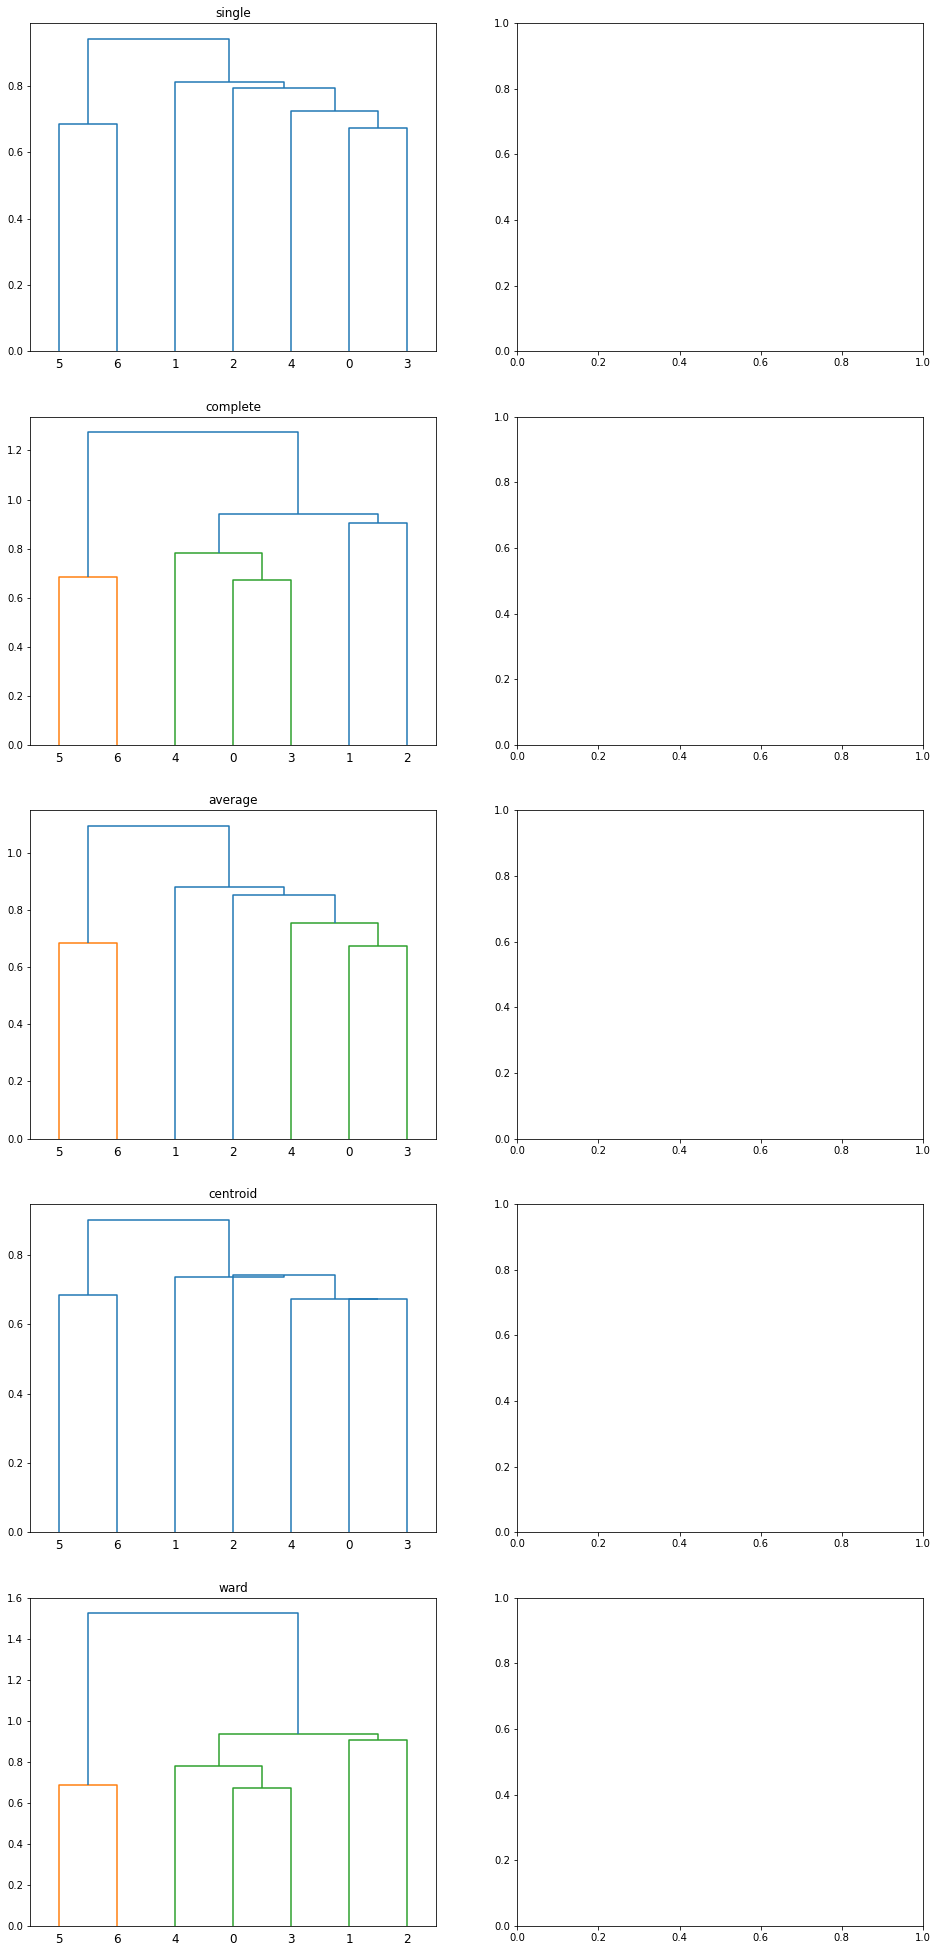

In [187]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = [df_l]

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()

In [440]:
srch_kwds = ['농업','주택','외환','부자','서민','공공','정부','핀테크','송금']

t_dt = dict()
for kwd in srch_kwds:
    tmp = []
    for bank in banks:
        corpus_embeddings = model.encode([bank])
        corpus_embeddings_2 = model.encode([kwd])
        t = cosine_similarity(corpus_embeddings, corpus_embeddings_2)
        tmp.append(t[0][0])
    t_dt[kwd] = tmp
    
df_l = pd.DataFrame(t_dt)
df_l.index = banks

In [441]:
df_l.rank(ascending = False)

,농업,주택,외환,부자,서민,공공,정부,핀테크,송금
농협은행,1.0,3.0,6.0,5.0,5.0,4.0,5.0,7.0,3.0
신한은행,5.0,5.0,2.0,2.0,4.0,3.0,3.0,6.0,4.0
우리은행,2.0,2.0,3.0,6.0,2.0,1.0,1.0,5.0,2.0
하나은행,4.0,4.0,1.0,1.0,3.0,6.0,6.0,2.0,6.0
국민은행,3.0,1.0,5.0,3.0,1.0,2.0,2.0,4.0,5.0
카카오뱅크,6.0,6.0,7.0,7.0,7.0,5.0,4.0,1.0,7.0
토스뱅크,7.0,7.0,4.0,4.0,6.0,7.0,7.0,3.0,1.0


In [196]:
srch_kwds = ['메타버스','블록체인','nft','cbdc','인공지능','빅데이터','마이데이터','오픈뱅킹','클라우드','챗봇']

In [197]:
t_dt = dict()
for kwd in srch_kwds:
    tmp = []
    for bank in banks:
        corpus_embeddings = model.encode([bank])
        corpus_embeddings_2 = model.encode([kwd])
        t = cosine_similarity(corpus_embeddings, corpus_embeddings_2)
        tmp.append(t[0][0])
    t_dt[kwd] = tmp

In [198]:
df_l = pd.DataFrame(t_dt)
df_l.index = banks

In [199]:
df_l.T.sort_values(by = '농협은행',ascending = False)

,농협은행,신한은행,우리은행,하나은행,국민은행,카카오뱅크,토스뱅크
클라우드,0.443839,0.351948,0.275503,0.247603,0.261058,0.309010,0.219411
오픈뱅킹,0.351328,0.327737,0.389939,0.460831,0.402006,0.507548,0.490278
인공지능,0.307232,0.320324,0.327595,0.250674,0.330219,0.289258,0.159061
챗봇,0.300210,0.192161,0.322504,0.289208,0.213759,0.381969,0.246290
블록체인,0.282158,0.287546,0.364061,0.342011,0.253968,0.358579,0.327927
nft,0.277607,0.314948,0.192295,0.241067,0.367830,0.121073,0.170048
cbdc,0.268591,0.217631,0.121282,0.210421,0.221624,0.197289,0.117877
마이데이터,0.222936,0.237567,0.185056,0.225360,0.157118,0.155101,0.109686
빅데이터,0.198490,0.220359,0.126044,0.228546,0.189435,0.247669,0.124279
메타버스,0.101225,0.075784,0.075878,0.081657,0.150730,0.196868,0.170751


In [200]:
df_l.rank(ascending = False).T.sort_values(by = '농협은행')

,농협은행,신한은행,우리은행,하나은행,국민은행,카카오뱅크,토스뱅크
cbdc,1.0,3.0,6.0,4.0,2.0,5.0,7.0
클라우드,1.0,2.0,4.0,6.0,5.0,3.0,7.0
nft,3.0,2.0,5.0,4.0,1.0,7.0,6.0
마이데이터,3.0,1.0,4.0,2.0,5.0,6.0,7.0
챗봇,3.0,7.0,2.0,4.0,6.0,1.0,5.0
메타버스,4.0,7.0,6.0,5.0,3.0,1.0,2.0
인공지능,4.0,3.0,2.0,6.0,1.0,5.0,7.0
빅데이터,4.0,3.0,6.0,2.0,5.0,1.0,7.0
블록체인,6.0,5.0,1.0,3.0,7.0,2.0,4.0
오픈뱅킹,6.0,7.0,5.0,3.0,4.0,1.0,2.0


In [372]:
df_kss = df_ks.copy()

In [377]:
for i in range(len(df_kss)):
    df_kss.iloc[i,:] = df_kss.iloc[i,:] / df_kss['tot_cnt'][i]

31

In [356]:
df_kss['202103'][:-1]

keyword
챗봇      inf
ai      inf
카드사     inf
가맹점주    inf
롯데카드    inf
       ... 
김다희     NaN
배윤혜     NaN
박규석     NaN
남혜원     NaN
문성규     NaN
Name: 202103, Length: 20386, dtype: float64

In [388]:
f_date = '202103'
t_date = '202207'
kwd = '메타버스'
a = df_kss.loc[[kwd],:].iloc[:,list(df_kss).index(f_date):list(df_kss).index(t_date)+1].values

array([0.00462635, 0.00984569, 0.01286834, 0.00570418, 0.00624747,
       0.00289104, 0.00283044, 0.00478068, 0.00697083, 0.00421884,
       0.00246831, 0.00437176, 0.0055605 , 0.00460198, 0.00285024,
       0.00543927, 0.00637474])

In [396]:
from scipy.spatial import distance
tmp = []

for b in df_kss.iloc[:,list(df_kss).index(f_date):list(df_kss).index(t_date)+1].values:
    try:
        a = df_kss.loc[[kwd],:].iloc[:,list(df_kss).index(f_date):list(df_kss).index(t_date)+1].values
        d = distance.euclidean(a, b)
        tmp.append(d)
    except:
        tmp.append(1)
        print(b)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [404]:
df_kss['sm'] = tmp